In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/twitter_training.csv', header=None)

In [ ]:
df.columns = ['Tweet_ID', 'Entity','Sentiment','Tweet_Content']

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# Check for any missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Tweet_ID           0
Entity             0
Sentiment          0
Tweet_Content    686
dtype: int64


In [ ]:
# Remove rows with missing values
df_cleaned = df.dropna()
# Print the shape of the cleaned dataset
print("Shape of the cleaned dataset after removing missing values:", df_cleaned.shape)

Shape of the cleaned dataset after removing missing values: (73996, 4)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Count the number of tweets for each sentiment category
sentiment_counts = df_cleaned['Sentiment'].value_counts()
print(sentiment_counts)

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: Sentiment, dtype: int64


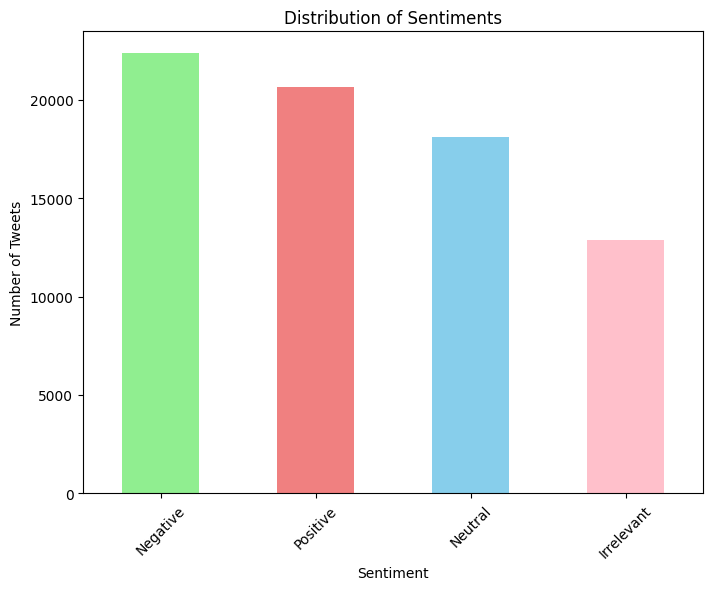

In [ ]:
# Visualize the distribution of sentiments using a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['lightgreen', 'lightcoral', 'skyblue','pink'])  # Assuming 'Positive', 'Negative', 'Neutral' as colors respectively
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

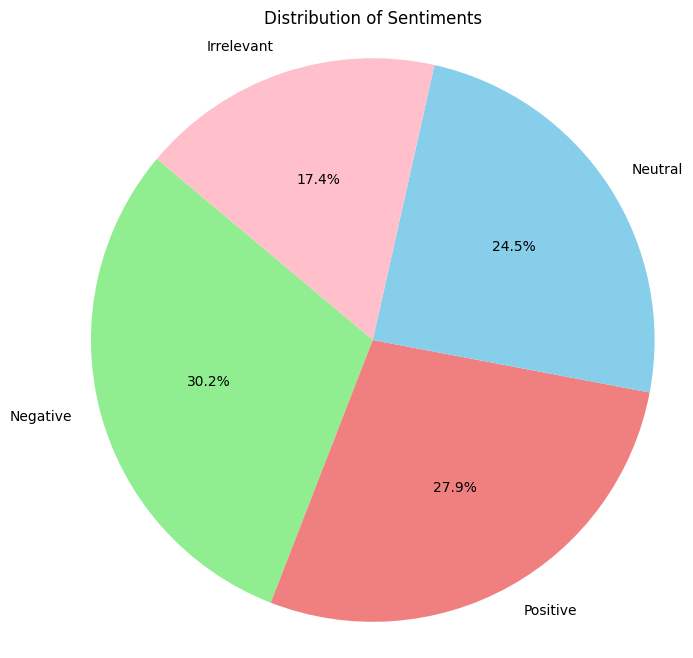

In [ ]:
# Alternatively, you can use a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral', 'skyblue','pink'])
plt.title('Distribution of Sentiments')
plt.axis('equal')
plt.show()

In [ ]:
import pandas as pd

# Get unique entities in the dataset
unique_entities = df_cleaned['Entity'].unique()

# Print the unique entities
print("Unique Entities:")
for entity in unique_entities:
    print(entity)


Unique Entities:
Borderlands
CallOfDutyBlackopsColdWar
Amazon
Overwatch
Xbox(Xseries)
NBA2K
Dota2
PlayStation5(PS5)
WorldOfCraft
CS-GO
Google
AssassinsCreed
ApexLegends
LeagueOfLegends
Fortnite
Microsoft
Hearthstone
Battlefield
PlayerUnknownsBattlegrounds(PUBG)
Verizon
HomeDepot
FIFA
RedDeadRedemption(RDR)
CallOfDuty
TomClancysRainbowSix
Facebook
GrandTheftAuto(GTA)
MaddenNFL
johnson&johnson
Cyberpunk2077
TomClancysGhostRecon
Nvidia


In [ ]:
# Iterate over each unique entity
for entity in unique_entities:
    # Filter the DataFrame for the current entity
    entity_df = df_cleaned[df_cleaned['Entity'] == entity]

    # Count the number of tweets for each sentiment category
    sentiment_counts = entity_df['Sentiment'].value_counts()

    # Print the count of tweets for each sentiment category for the entity
    print(f"Sentiment distribution for '{entity}':")
    print(sentiment_counts)


Sentiment distribution for 'Borderlands':
Positive      1017
Neutral        597
Negative       426
Irrelevant     240
Name: Sentiment, dtype: int64
Sentiment distribution for 'CallOfDutyBlackopsColdWar':
Positive      856
Irrelevant    569
Negative      566
Neutral       352
Name: Sentiment, dtype: int64
Sentiment distribution for 'Amazon':
Neutral       1207
Negative       575
Positive       308
Irrelevant     186
Name: Sentiment, dtype: int64
Sentiment distribution for 'Overwatch':
Positive      726
Irrelevant    667
Negative      627
Neutral       296
Name: Sentiment, dtype: int64
Sentiment distribution for 'Xbox(Xseries)':
Positive      785
Irrelevant    714
Neutral       411
Negative      373
Name: Sentiment, dtype: int64
Sentiment distribution for 'NBA2K':
Negative      1469
Positive       424
Neutral        270
Irrelevant     180
Name: Sentiment, dtype: int64
Sentiment distribution for 'Dota2':
Negative      767
Neutral       588
Positive      579
Irrelevant    425
Name: Sentime

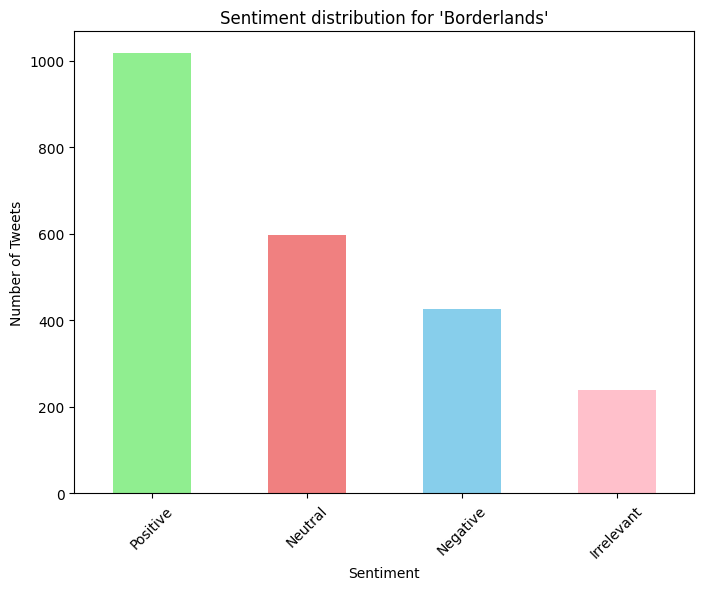

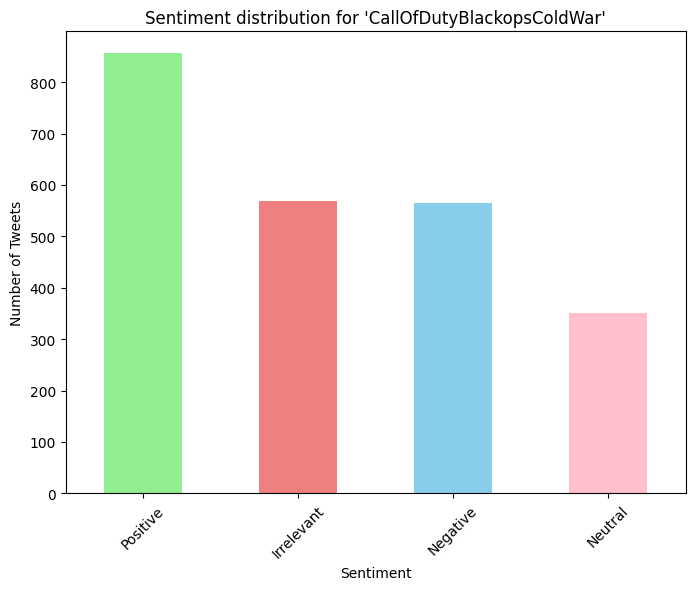

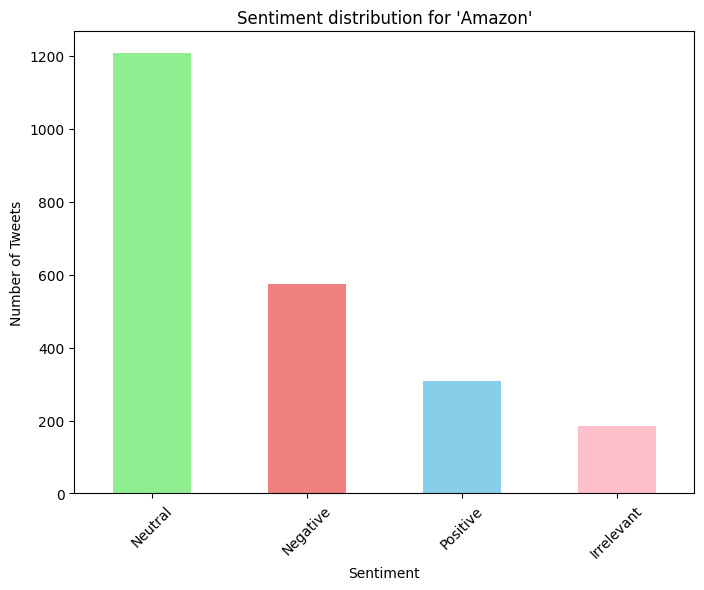

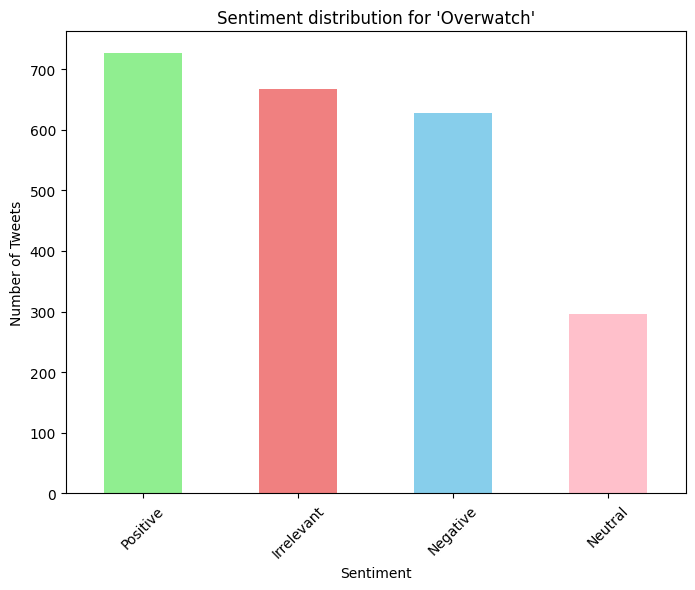

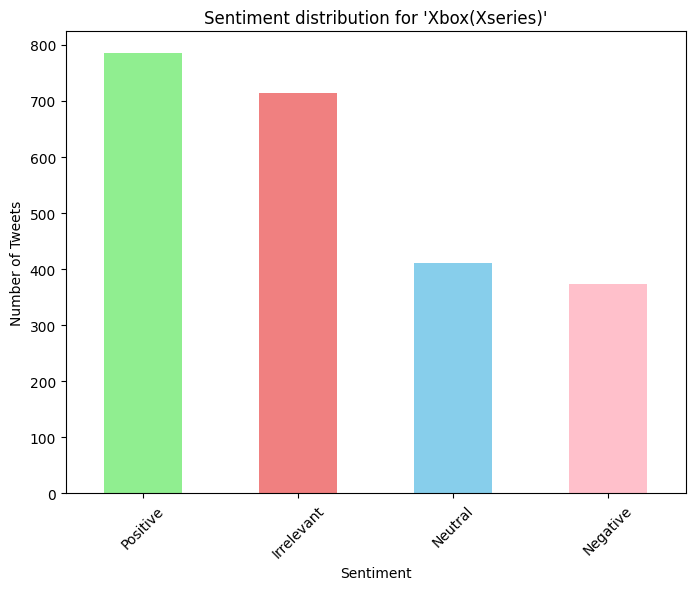

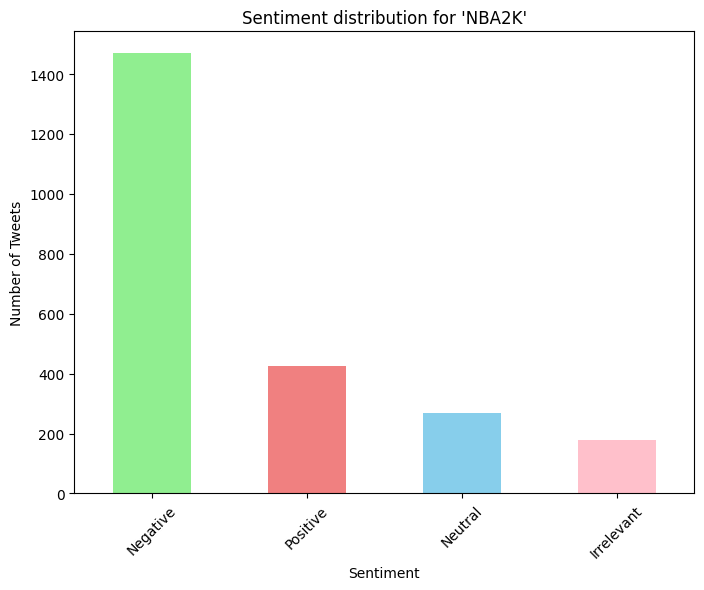

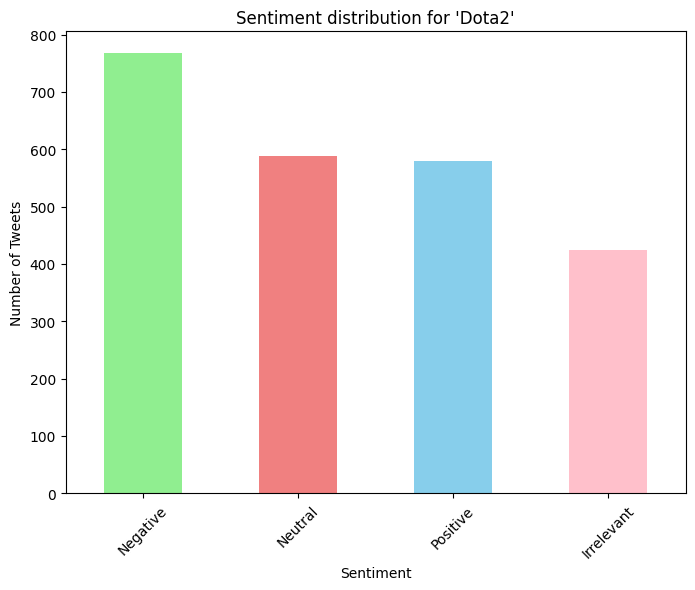

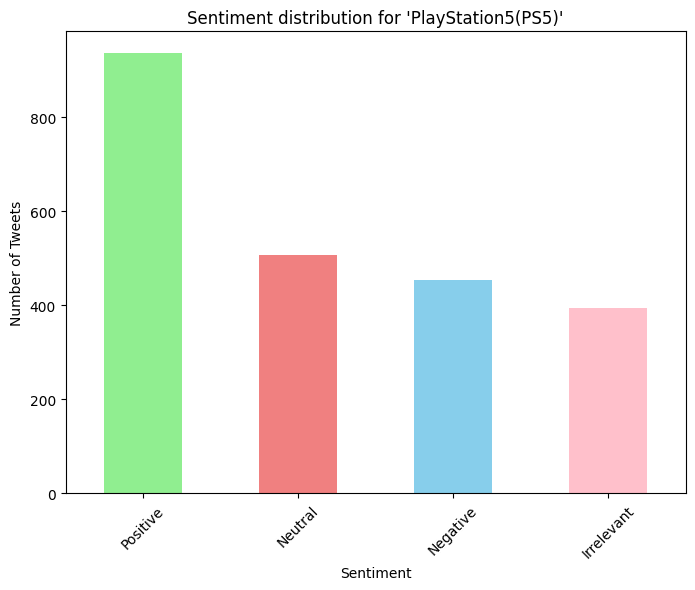

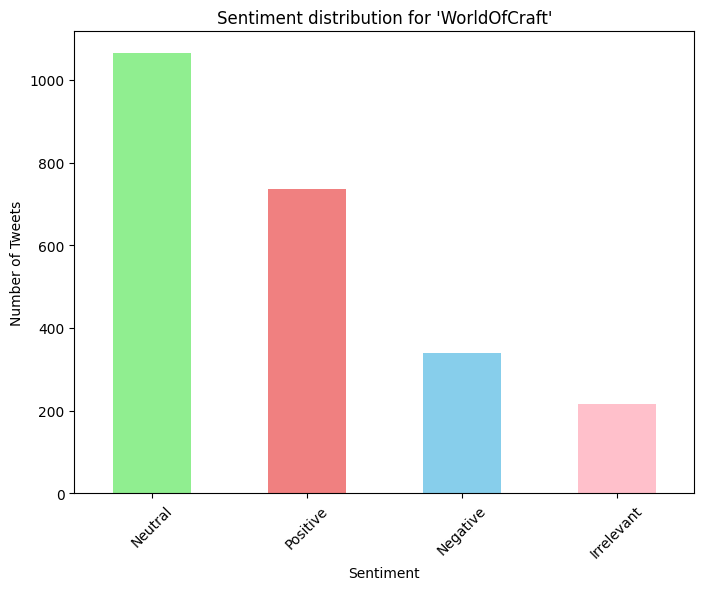

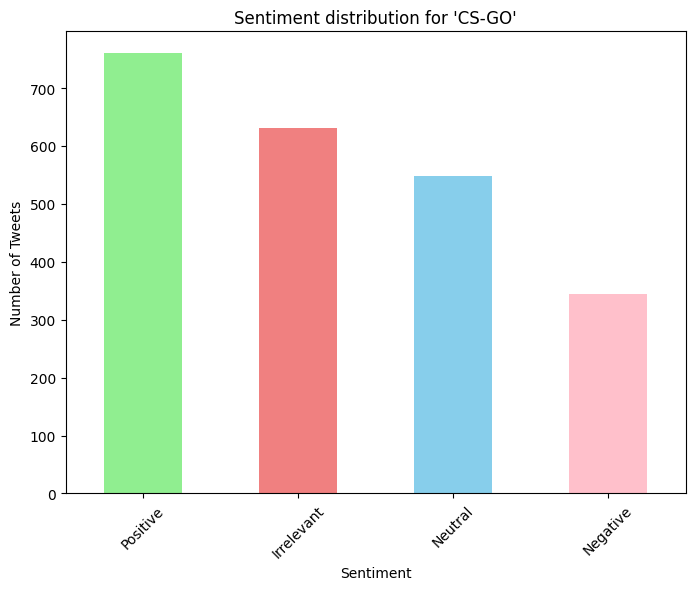

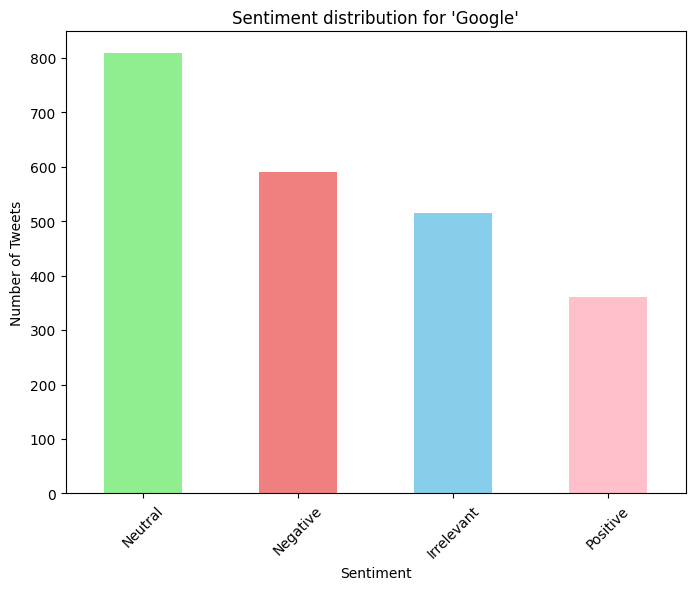

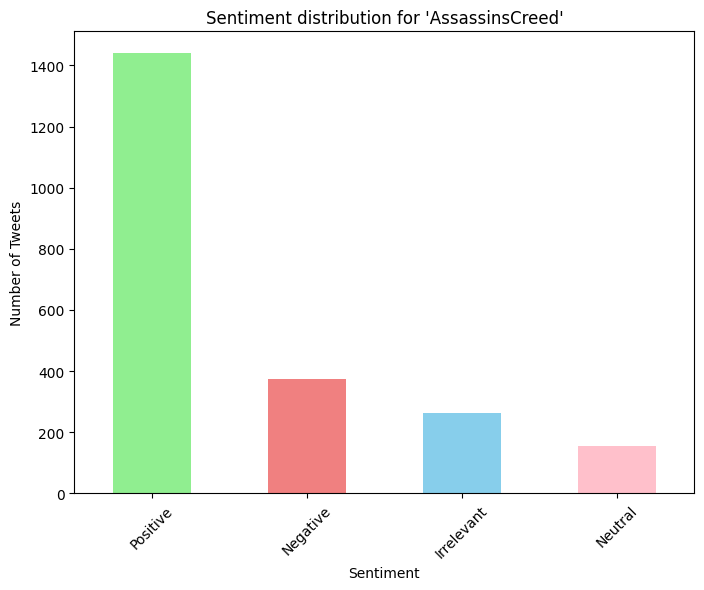

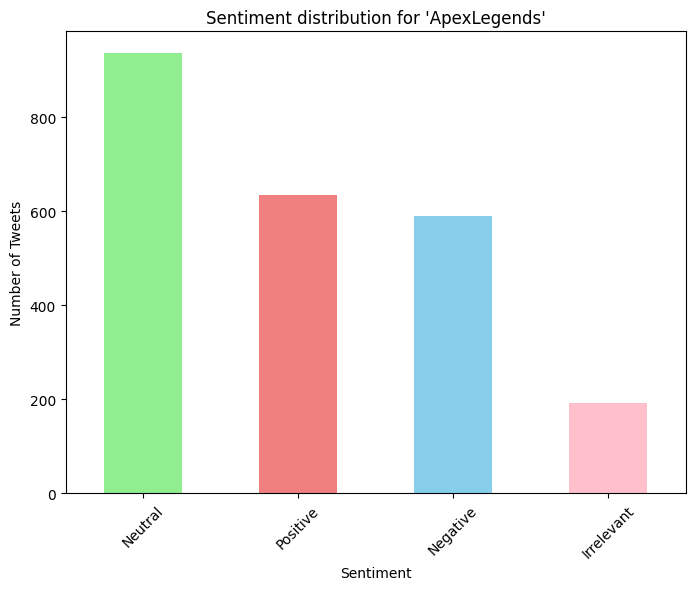

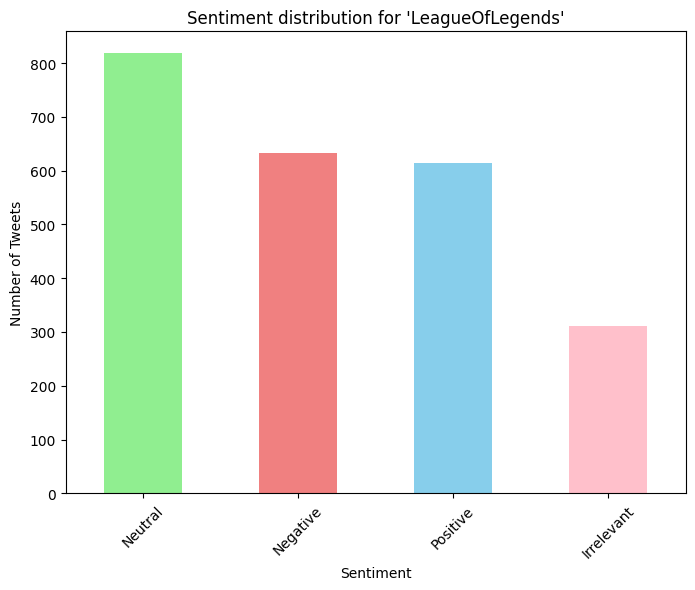

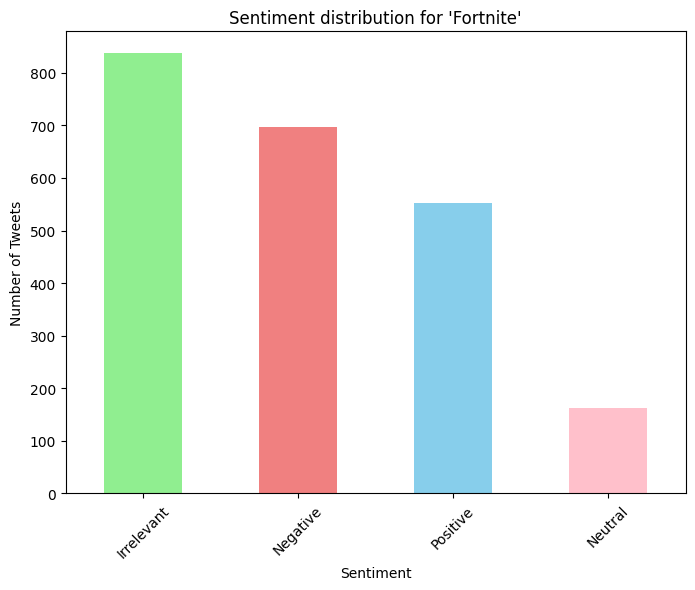

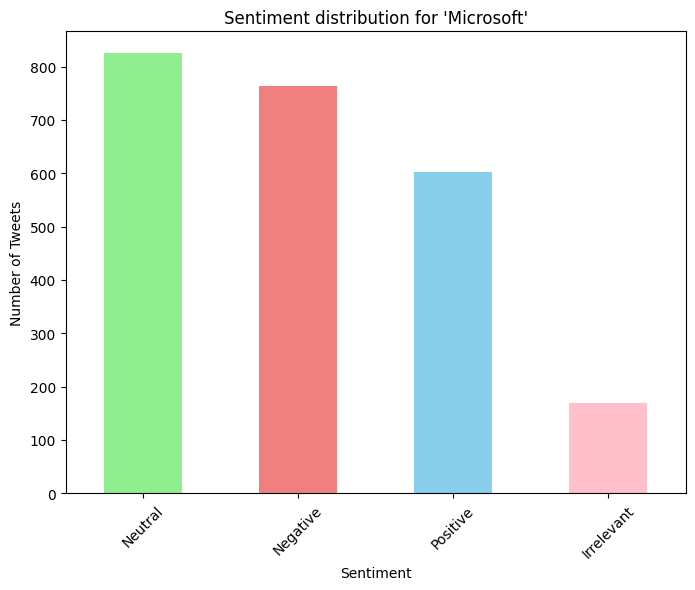

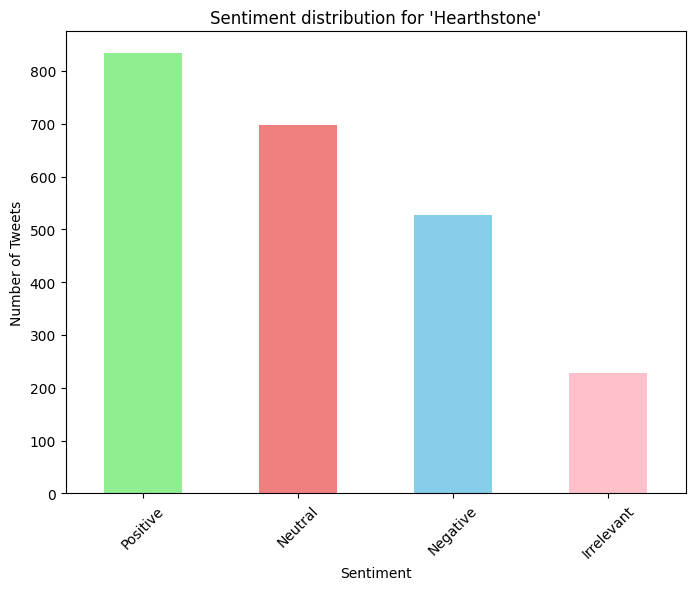

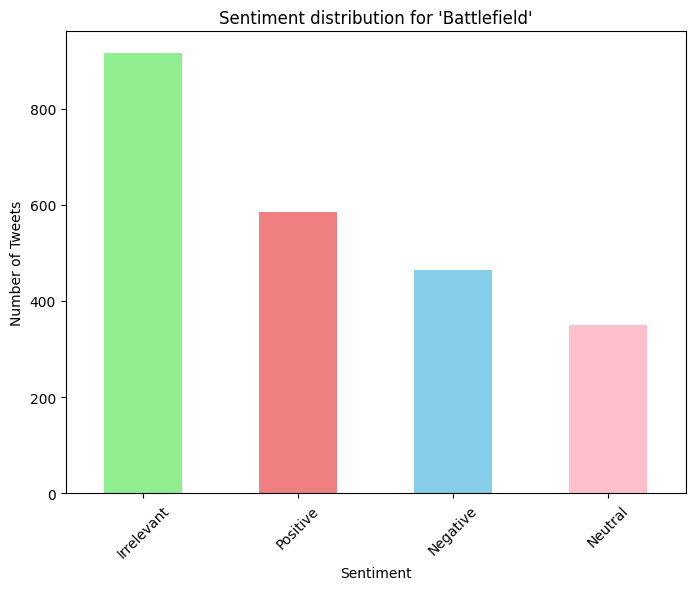

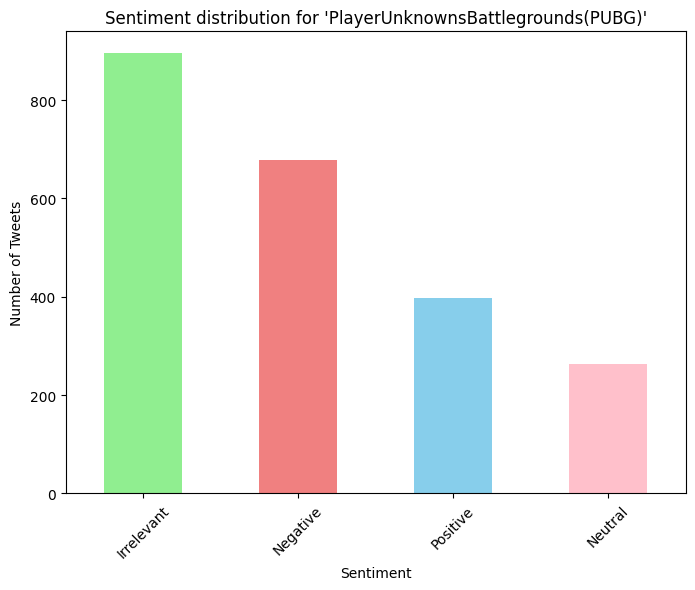

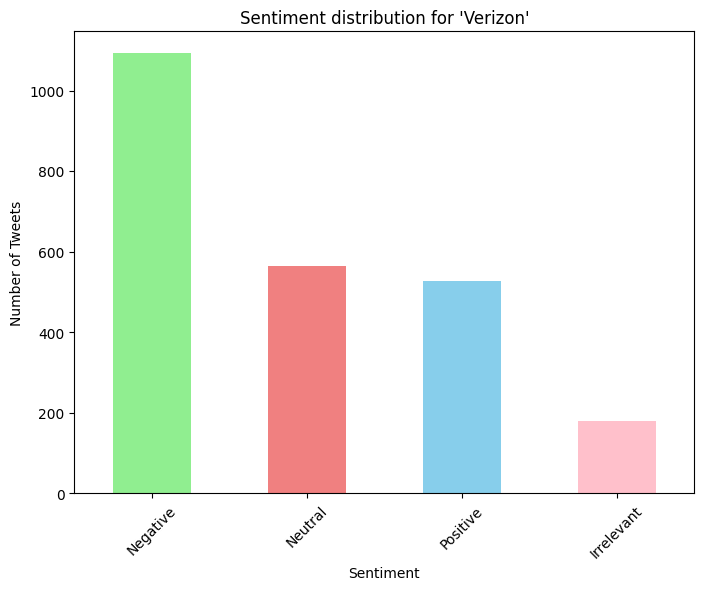

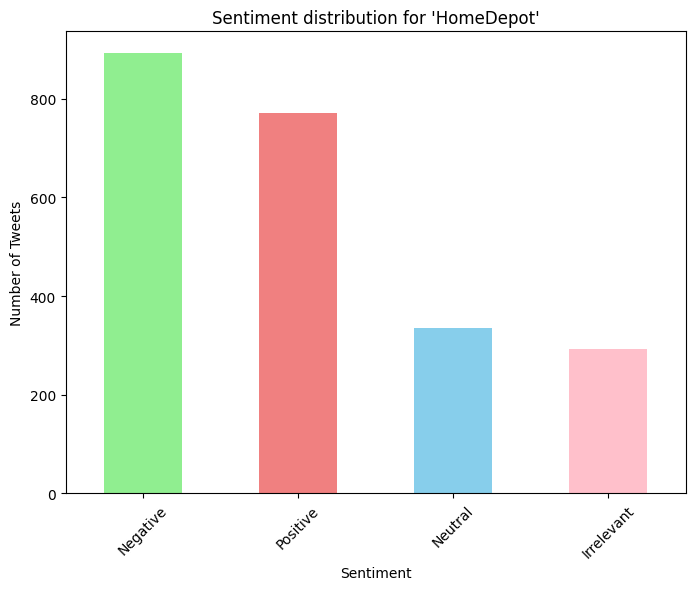

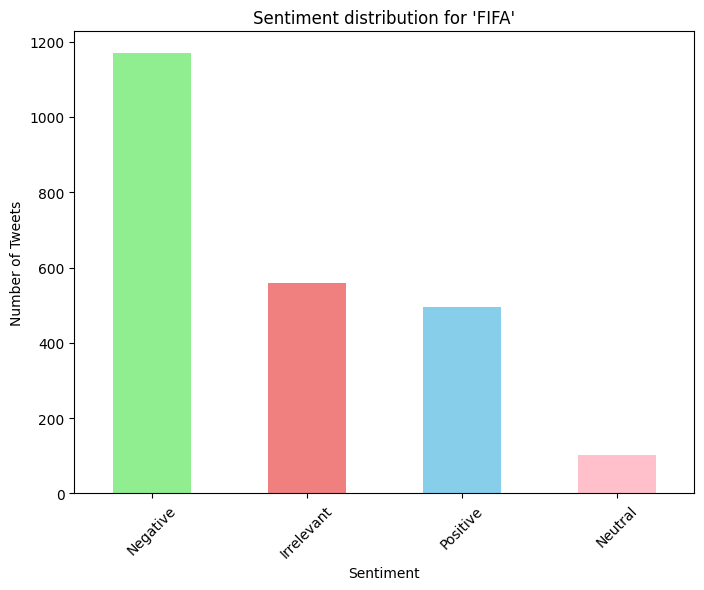

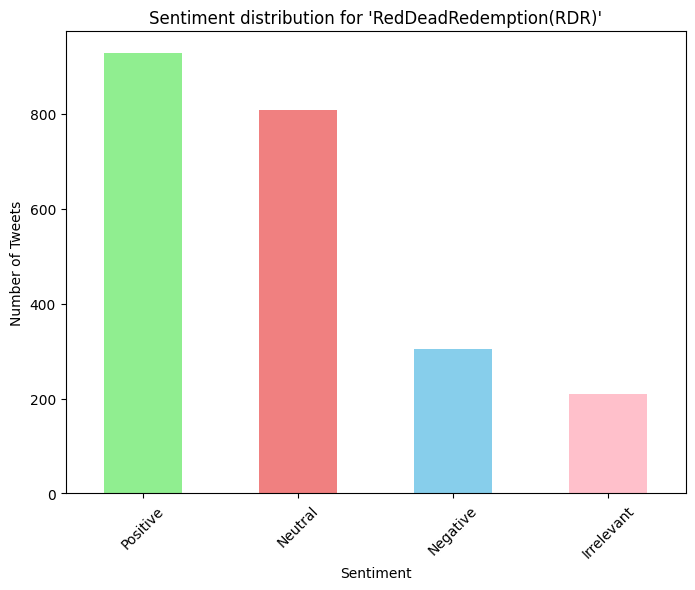

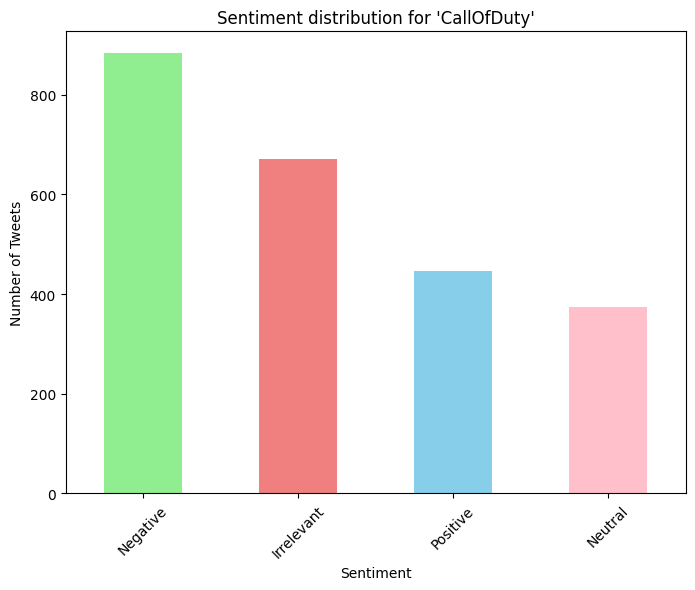

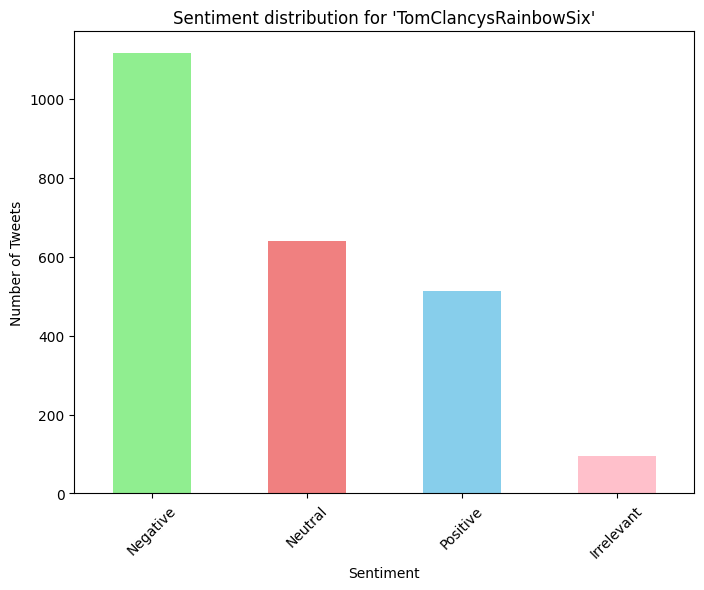

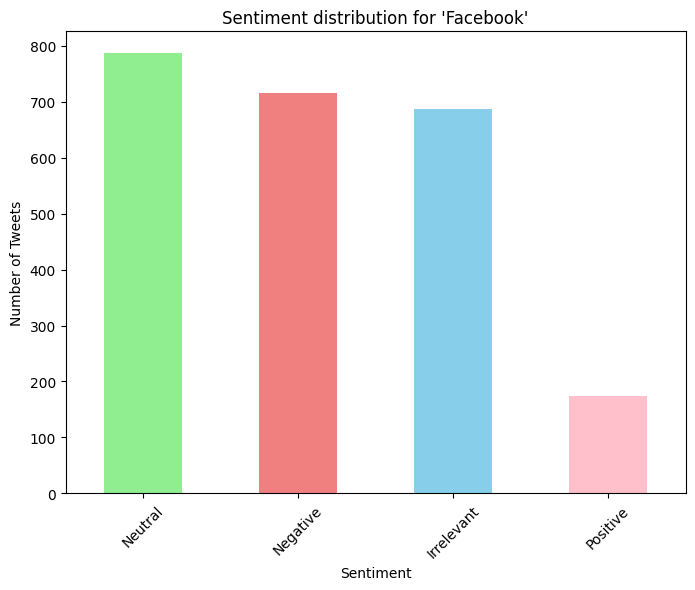

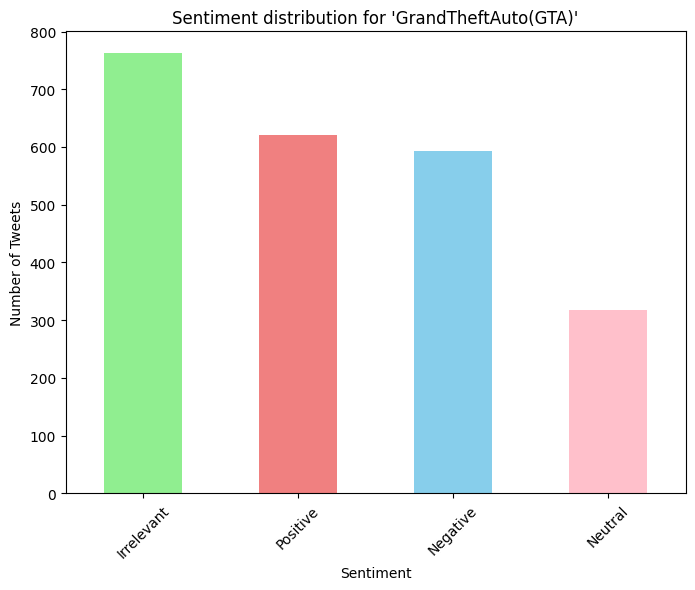

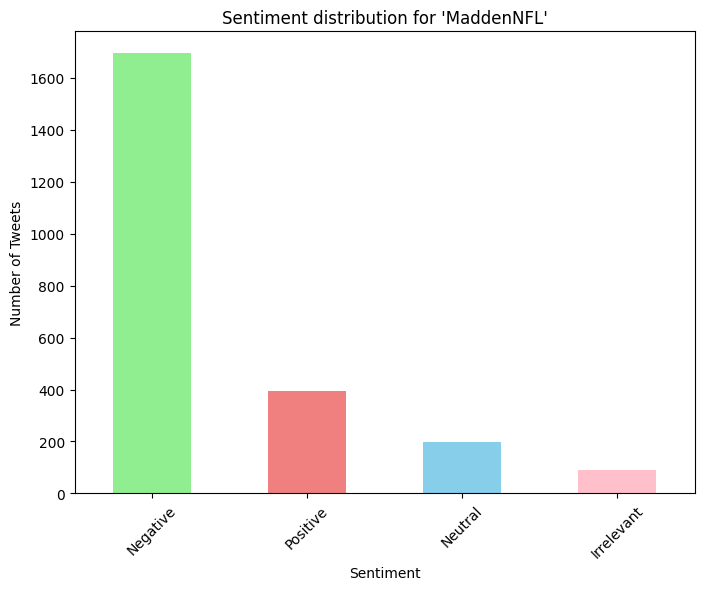

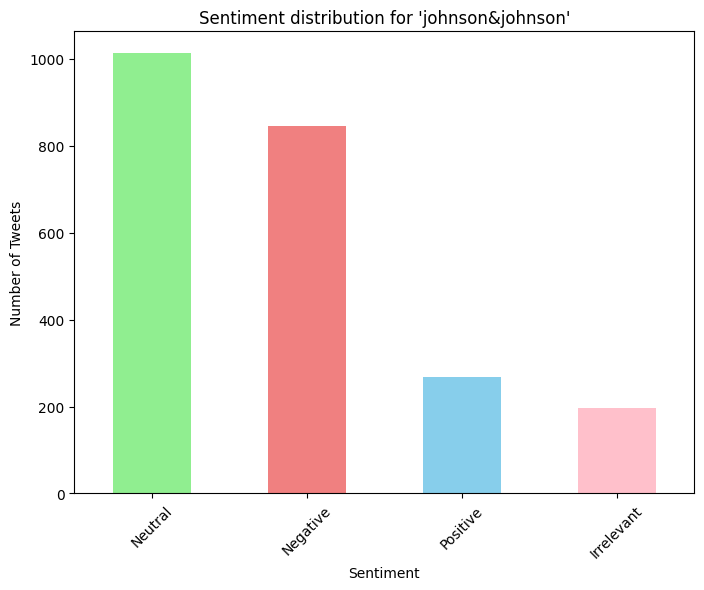

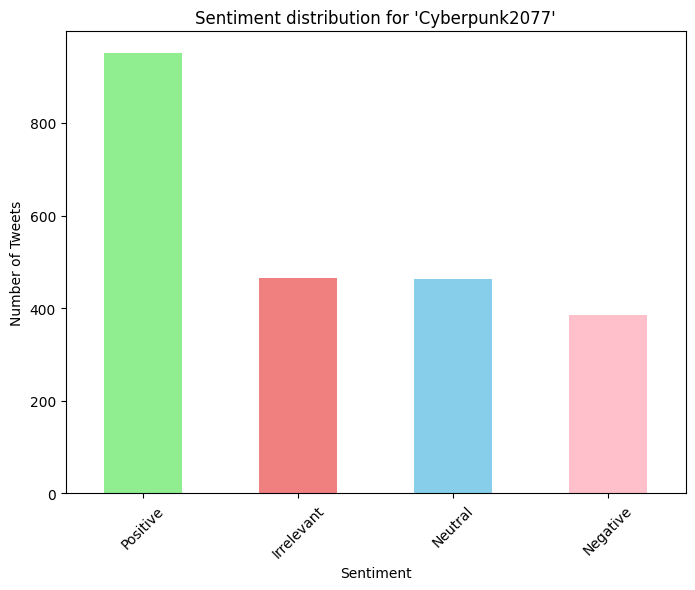

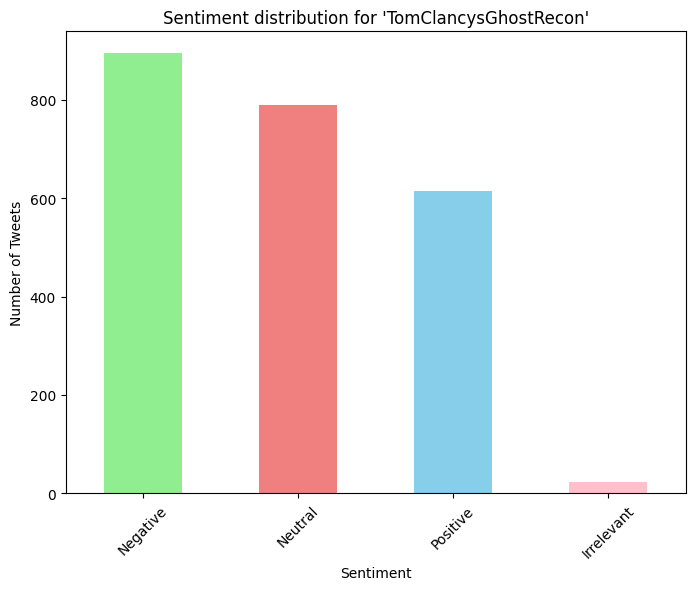

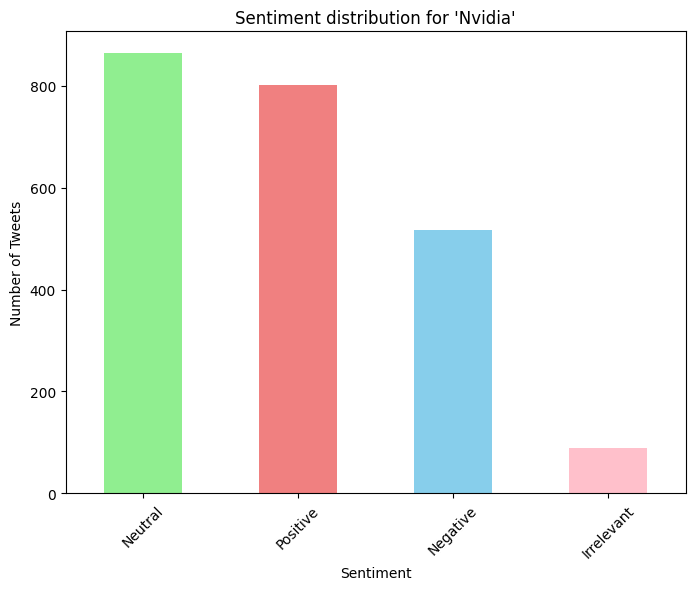

In [ ]:
# Iterate over each unique entity
for entity in unique_entities:
    # Filter the DataFrame for the current entity
    entity_df = df_cleaned[df_cleaned['Entity'] == entity]

    # Count the number of tweets for each sentiment category
    sentiment_counts = entity_df['Sentiment'].value_counts()

    # Visualize the sentiment distribution for the entity
    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar', color=['lightgreen', 'lightcoral', 'skyblue','pink'])  # Using light colors for Positive and Negative sentiments
    plt.title(f"Sentiment distribution for '{entity}'")
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Function for text preprocessing
def preprocess_text(text):
    # Check if text is NaN
    if pd.isna(text):
        return ''
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into text
    processed_text = ' '.join(filtered_tokens)
    return processed_text

# Apply text preprocessing to the tweet content
df_cleaned.loc[:, 'Processed_Content'] = df_cleaned['Tweet_Content'].apply(preprocess_text)

# Print the processed content for the first few tweets
for idx, processed_text in enumerate(df_cleaned['Processed_Content'][:5]):
    print(f"Processed Content for Tweet {idx+1}:")
    print(processed_text)
    print()


Processed Content for Tweet 1:
im getting borderlands murder

Processed Content for Tweet 2:
coming borders kill

Processed Content for Tweet 3:
im getting borderlands kill

Processed Content for Tweet 4:
im coming borderlands murder

Processed Content for Tweet 5:
im getting borderlands 2 murder



<ipython-input-18-864e7e3b7e61>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Processed_Content'] = df_cleaned['Tweet_Content'].apply(preprocess_text)


<Figure size 1000x600 with 0 Axes>

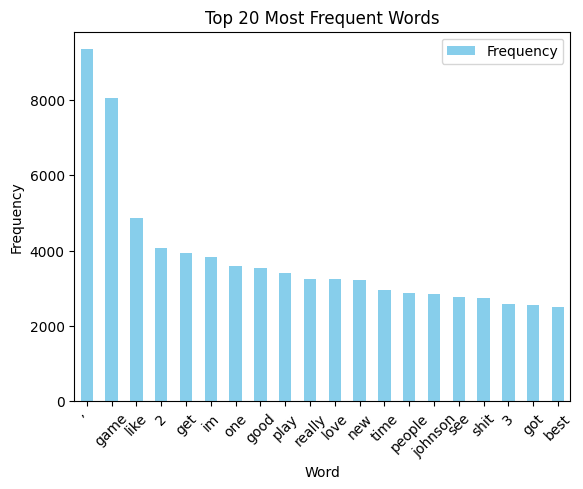

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter


# Analyze the most frequent words
all_words = ' '.join(df_cleaned['Processed_Content'])
word_freq = Counter(all_words.split())

# Plot word frequency distribution
plt.figure(figsize=(10, 6))
word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
word_freq_df.plot(kind='bar', x='Word', y='Frequency', color='skyblue')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


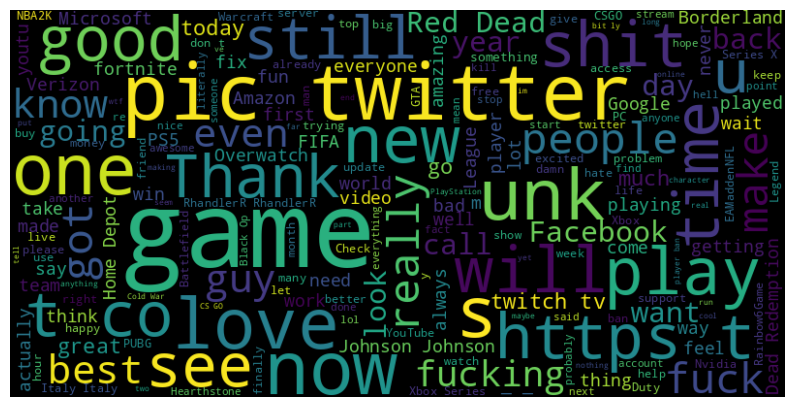

In [ ]:
from wordcloud import WordCloud
df = df[df['Tweet_Content'].apply(lambda x: isinstance(x, str))]
# Concatenate all text into a single string
text = ' '.join(df['Tweet_Content'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**extra trees**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

X = df_cleaned['Processed_Content']
y = df_cleaned['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the Extra Trees classifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9047972972972973


**Extra trees with knn with tfid vectorizer**

Accuracy: 0.893918918918919
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.87      0.90      0.88      2696
    Negative       0.84      0.95      0.90      4380
     Neutral       0.92      0.87      0.90      3605
    Positive       0.95      0.85      0.90      4119

    accuracy                           0.89     14800
   macro avg       0.90      0.89      0.89     14800
weighted avg       0.90      0.89      0.89     14800



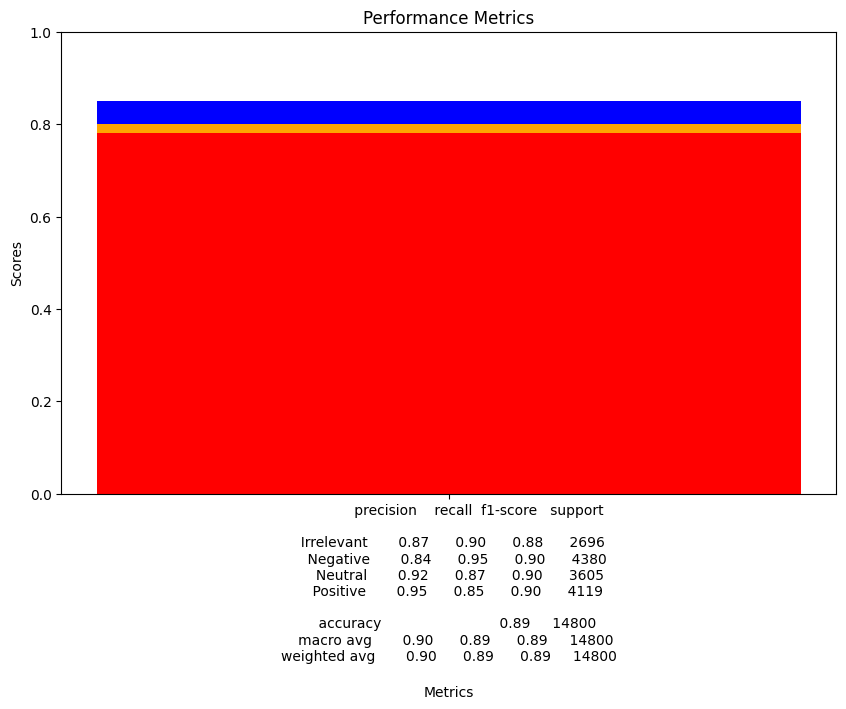

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming df_cleaned is already defined as in the previous code snippets

# Splitting the dataset into features and target variable
X = df_cleaned['Tweet_Content']
y = df_cleaned['Sentiment']

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Create a voting classifier combining the individual classifiers
voting_classifier = VotingClassifier(estimators=[('knn', knn_classifier), ('extra_trees', extra_trees_classifier)], voting='hard')

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = voting_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Assuming the following scores represent the performance of different models or metrics
scores = [0.85, 0.72, 0.80, 0.78]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(report, scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics')
plt.ylim(0, 1)  # Set the y-axis limits from 0 to 1 for scores
plt.show()


**KNN with TF-IDF vectorization**

Accuracy: 0.8858108108108108
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.88      0.86      0.87      2696
    Negative       0.90      0.91      0.91      4380
     Neutral       0.91      0.87      0.89      3605
    Positive       0.85      0.89      0.87      4119

    accuracy                           0.89     14800
   macro avg       0.89      0.88      0.88     14800
weighted avg       0.89      0.89      0.89     14800



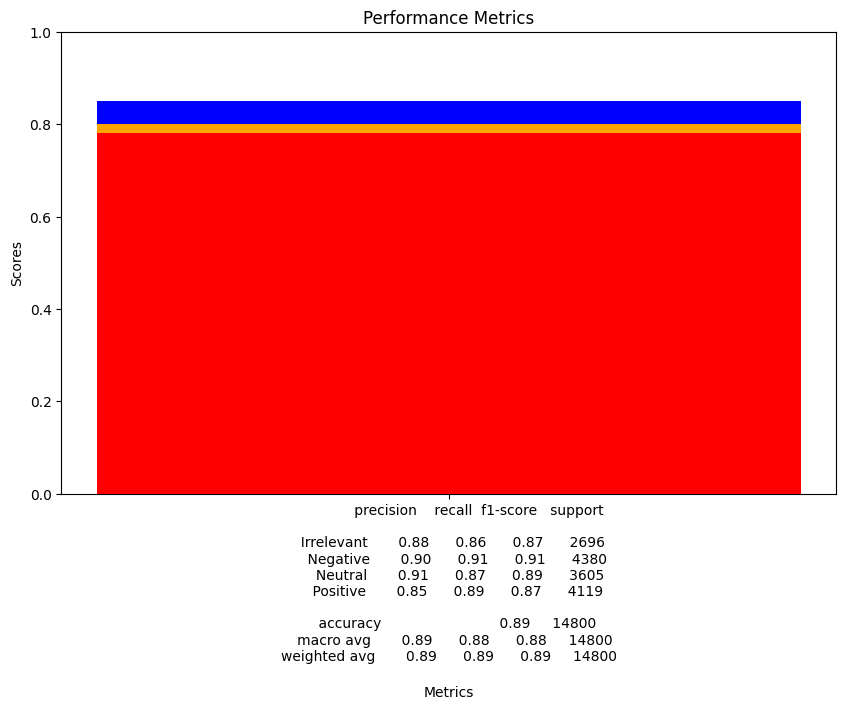

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Assigning appropriate column names if not already done
df_cleaned.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']

# Splitting the dataset into features and target variable
X = df_cleaned['Tweet_Content']
y = df_cleaned['Sentiment']

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize the Fused KNN classifier
# Fused KNN is a combination of KNN and another classifier, but it's not a standard algorithm in scikit-learn
# You may need to implement Fused KNN yourself or use a third-party library if available
# Alternatively, you can use regular KNN as shown below
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

scores = [0.85, 0.72, 0.80, 0.78]
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(report, scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics')
plt.ylim(0, 1)  # Set the y-axis limits from 0 to 1 for scores
plt.show()
